In [12]:

import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

dataset = pd.read_csv(r'moods_preprocessed.csv')

dataset.head()


,Unnamed: 0,tempo,instrumentalness,acousticness,energy,valence,loudness,mood
0,0,118.523,0.000000,0.13700,0.730,0.625,0.779912,Happy
1,1,120.255,0.196000,0.01890,0.832,0.166,0.852145,Sad
2,2,136.168,0.000077,0.91300,0.139,0.116,0.615590,Sad
3,3,193.100,0.000006,0.08900,0.438,0.587,0.672509,Happy
4,4,169.881,0.000000,0.00171,0.932,0.445,0.885932,Energetic


In [13]:
dataset['mood']=dataset['mood'].map({'Happy':0, 'Sad':1, 'Energetic': 2, 'Calm':3 }).astype(int)
dataset.head()


,Unnamed: 0,tempo,instrumentalness,acousticness,energy,valence,loudness,mood
0,0,118.523,0.000000,0.13700,0.730,0.625,0.779912,0
1,1,120.255,0.196000,0.01890,0.832,0.166,0.852145,1
2,2,136.168,0.000077,0.91300,0.139,0.116,0.615590,1
3,3,193.100,0.000006,0.08900,0.438,0.587,0.672509,0
4,4,169.881,0.000000,0.00171,0.932,0.445,0.885932,2


In [14]:
data= pd.DataFrame(dataset, columns=['tempo', 'acousticness', 'instrumentalness', 'valence', 'energy', 'loudness', 'mood'])
data.head()
x_data=data.drop(['mood'], axis=1)
y_data=data['mood']

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)


In [21]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [16]:
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train, y_train, eval_metric='mlogloss', eval_set=evalset)

[0]	validation_0-mlogloss:0.98745	validation_1-mlogloss:1.02951
[1]	validation_0-mlogloss:0.75919	validation_1-mlogloss:0.83525
[2]	validation_0-mlogloss:0.59980	validation_1-mlogloss:0.70685
[3]	validation_0-mlogloss:0.49028	validation_1-mlogloss:0.61027
[4]	validation_0-mlogloss:0.41059	validation_1-mlogloss:0.54909
[5]	validation_0-mlogloss:0.34883	validation_1-mlogloss:0.50004
[6]	validation_0-mlogloss:0.29774	validation_1-mlogloss:0.46491
[7]	validation_0-mlogloss:0.25793	validation_1-mlogloss:0.43867
[8]	validation_0-mlogloss:0.22366	validation_1-mlogloss:0.41691
[9]	validation_0-mlogloss:0.19617	validation_1-mlogloss:0.40034
[10]	validation_0-mlogloss:0.17101	validation_1-mlogloss:0.38514
[11]	validation_0-mlogloss:0.15163	validation_1-mlogloss:0.37343
[12]	validation_0-mlogloss:0.13433	validation_1-mlogloss:0.36739
[13]	validation_0-mlogloss:0.12091	validation_1-mlogloss:0.35995
[14]	validation_0-mlogloss:0.11021	validation_1-mlogloss:0.35773
[15]	validation_0-mlogloss:0.10204	

C:\Users\Florence\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16]	validation_0-mlogloss:0.09230	validation_1-mlogloss:0.35280
[17]	validation_0-mlogloss:0.08502	validation_1-mlogloss:0.34749
[18]	validation_0-mlogloss:0.07966	validation_1-mlogloss:0.34464
[19]	validation_0-mlogloss:0.07352	validation_1-mlogloss:0.34474
[20]	validation_0-mlogloss:0.06888	validation_1-mlogloss:0.34472
[21]	validation_0-mlogloss:0.06499	validation_1-mlogloss:0.34669
[22]	validation_0-mlogloss:0.06001	validation_1-mlogloss:0.34561
[23]	validation_0-mlogloss:0.05635	validation_1-mlogloss:0.34427
[24]	validation_0-mlogloss:0.05281	validation_1-mlogloss:0.34393
[25]	validation_0-mlogloss:0.05003	validation_1-mlogloss:0.34324
[26]	validation_0-mlogloss:0.04741	validation_1-mlogloss:0.34446
[27]	validation_0-mlogloss:0.04464	validation_1-mlogloss:0.34664
[28]	validation_0-mlogloss:0.04239	validation_1-mlogloss:0.34459
[29]	validation_0-mlogloss:0.04010	validation_1-mlogloss:0.34417
[30]	validation_0-mlogloss:0.03815	validation_1-mlogloss:0.34288
[31]	validation_0-mloglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)

In [18]:
print('Accuracy: ',score)

Accuracy:  0.855072463768116


In [19]:
results = model.evals_result()

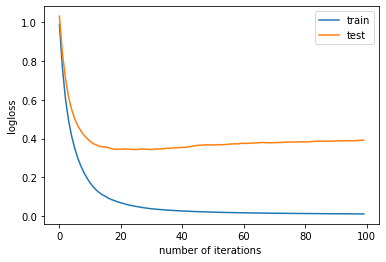

In [20]:
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='test')
plt.xlabel('number of iterations ')
plt.ylabel('logloss')
# show the legend
plt.legend()
# show the plot
plt.show()